In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df_word = pd.read_csv("out/df_noise_word3.csv")
df_char = pd.read_csv("out/df_noise_char4.csv")

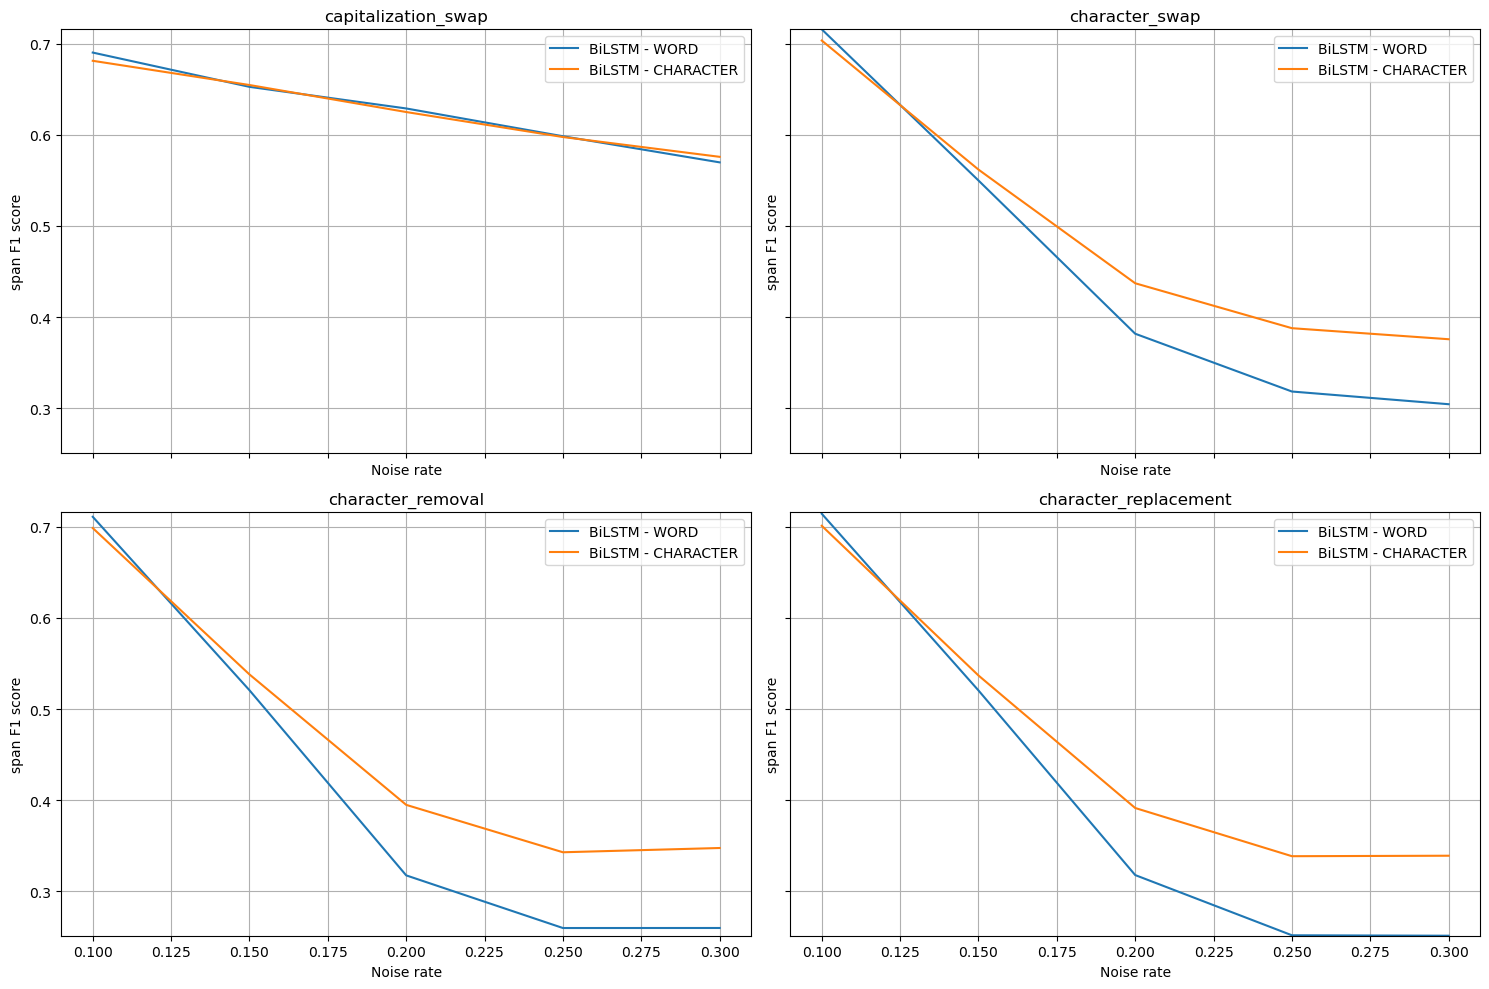

In [13]:
# Get unique noise types
noise_types = df_word['Noise Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min())
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max())

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Noise Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    
    # Plotting
    axs[i].plot(df_model1_filtered['Noise Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


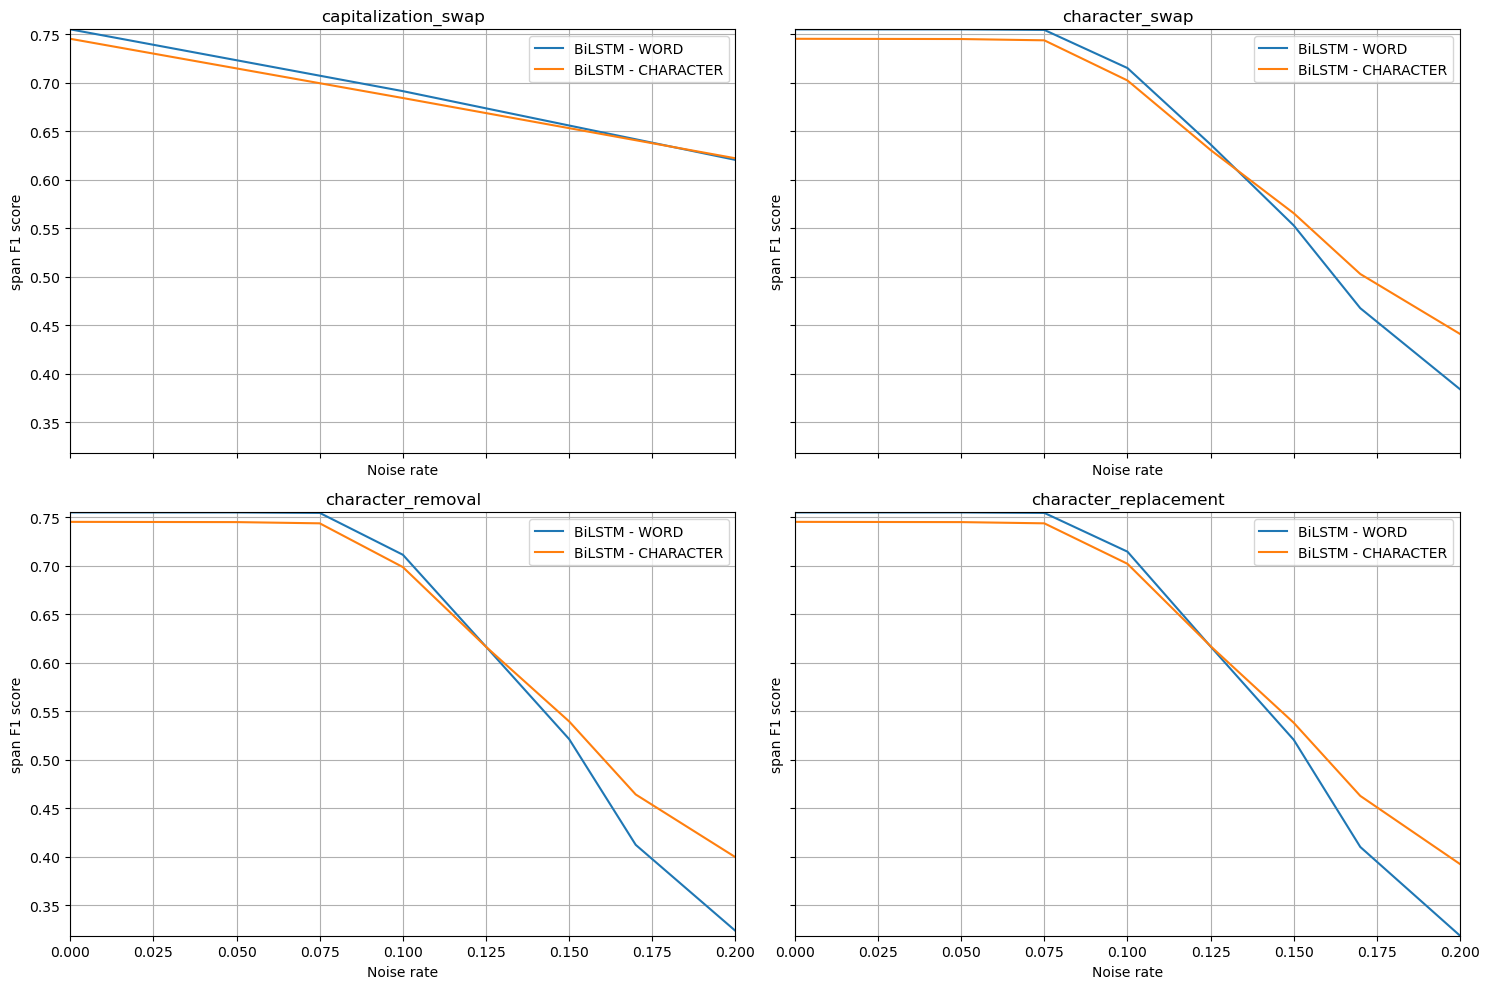

In [15]:
df_word = pd.read_csv("out/altered_2_word.csv")
df_char = pd.read_csv("out/altered_2_char.csv")

noise_types = df_word['Noise Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min())
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max())

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Noise Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    
    # Plotting
    axs[i].plot(df_model1_filtered['Noise Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].set_xlim(0, 0.2)       # Set the x-range from 0 to 0.2
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


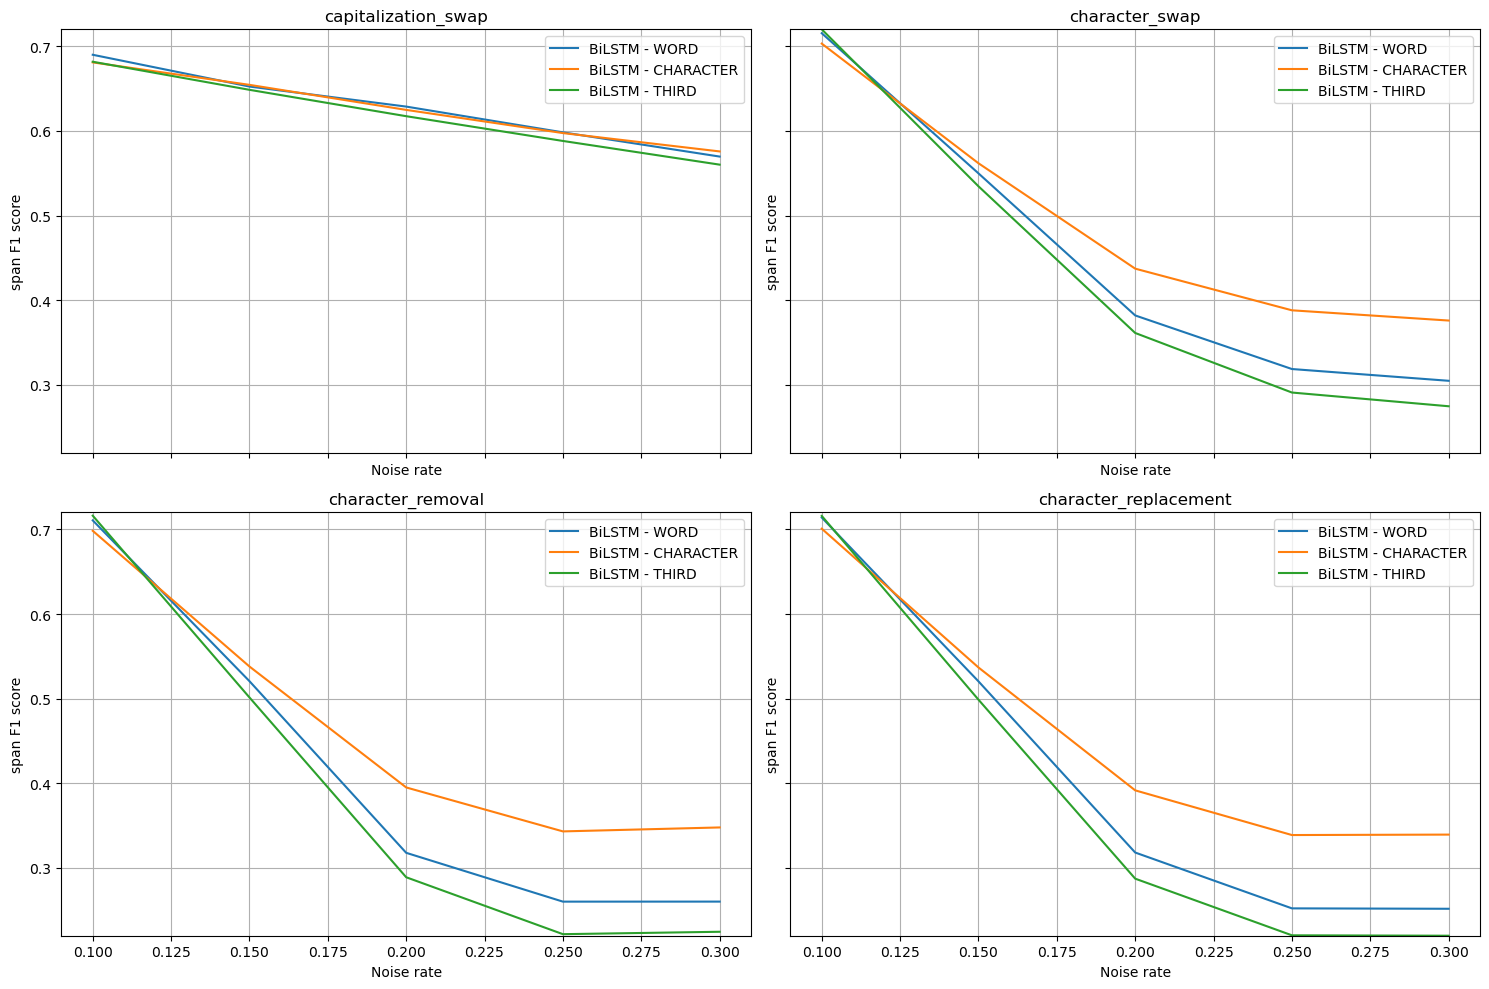

In [4]:
df_word = pd.read_csv("out/df_altered_word.csv")
df_char = pd.read_csv("out/df_altered_char.csv")
df_random = pd.read_csv("out/df_altered_random.csv")

# Get unique noise types
noise_types = df_word['Noise Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(), df_random['F1 Score'].min())
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(), df_random['F1 Score'].max())

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Noise Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model3_filtered = df_random[df_random['Type'] == noise_type]
    
    # Plotting
    axs[i].plot(df_model1_filtered['Noise Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].plot(df_model3_filtered['Rate'], df_model3_filtered['F1 Score'], label='BiLSTM - THIRD')  # Add third dataset plot
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


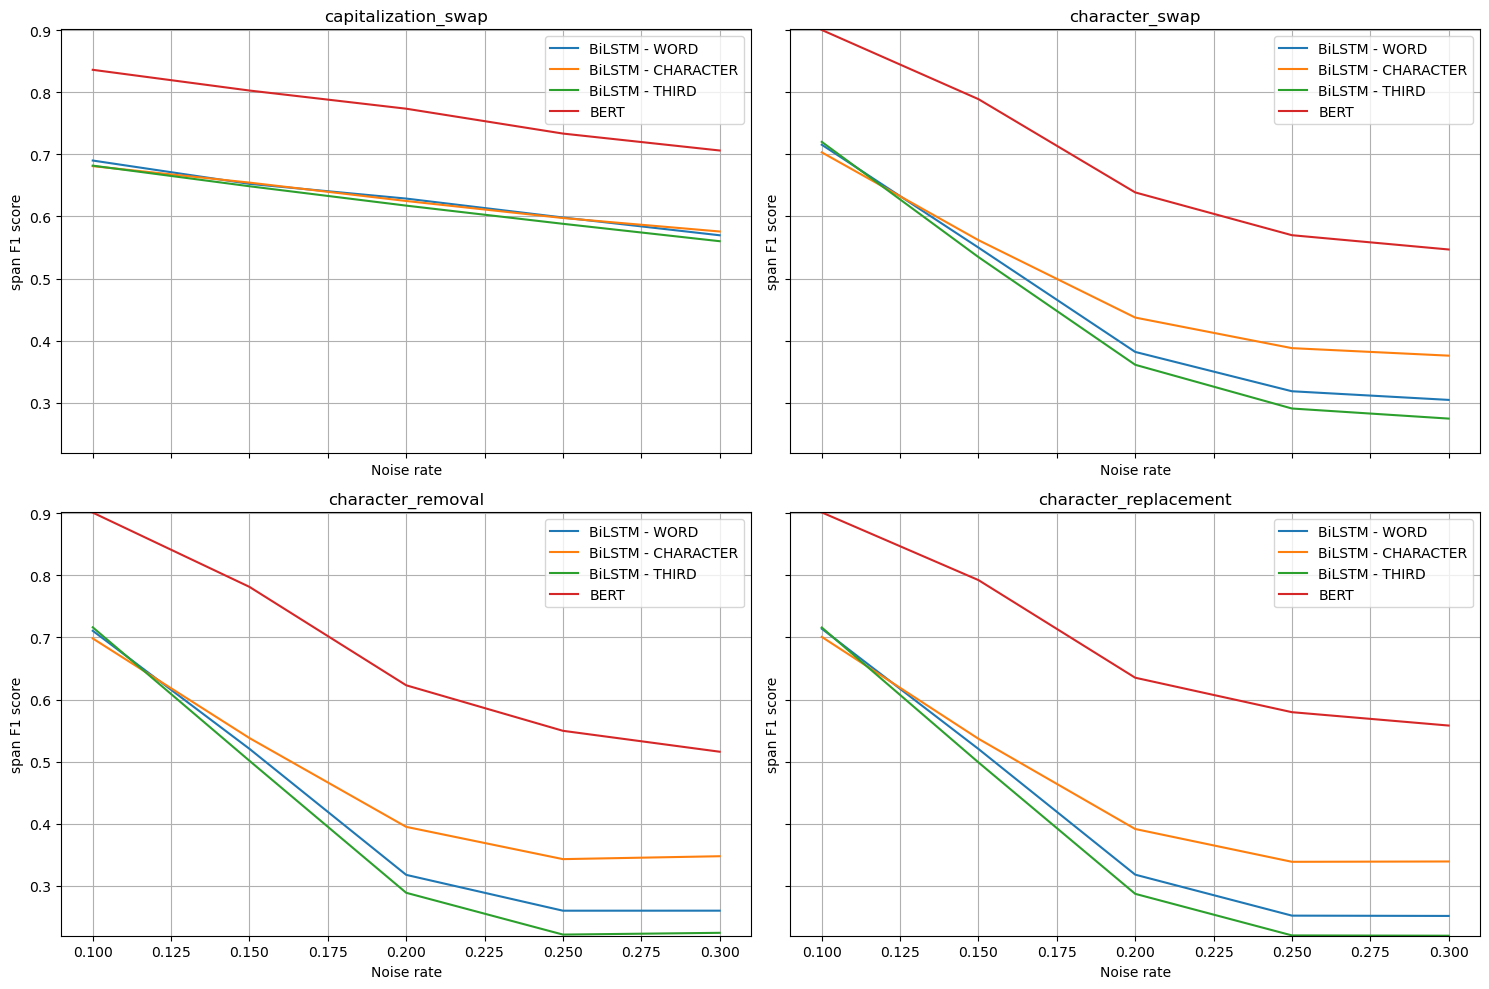

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
df_word = pd.read_csv("out/df_altered_word.csv")
df_char = pd.read_csv("out/df_altered_char.csv")
df_random = pd.read_csv("out/df_altered_random.csv")
df_bert = pd.read_csv("out/df_altered_bert.csv")  # Add this line to read BERT data

# Get unique noise types
noise_types = df_word['Noise Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(), df_random['F1 Score'].min(), df_bert['F1 Score'].min())  # Include BERT
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(), df_random['F1 Score'].max(), df_bert['F1 Score'].max())  # Include BERT

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Noise Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model3_filtered = df_random[df_random['Type'] == noise_type]
    df_model4_filtered = df_bert[df_bert['Type'] == noise_type]  # Filter BERT data
    
    # Plotting
    axs[i].plot(df_model1_filtered['Noise Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].plot(df_model3_filtered['Rate'], df_model3_filtered['F1 Score'], label='BiLSTM - THIRD')
    axs[i].plot(df_model4_filtered['Rate'], df_model4_filtered['F1 Score'], label='BERT')  # Add BERT plot
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


#### Altered 2

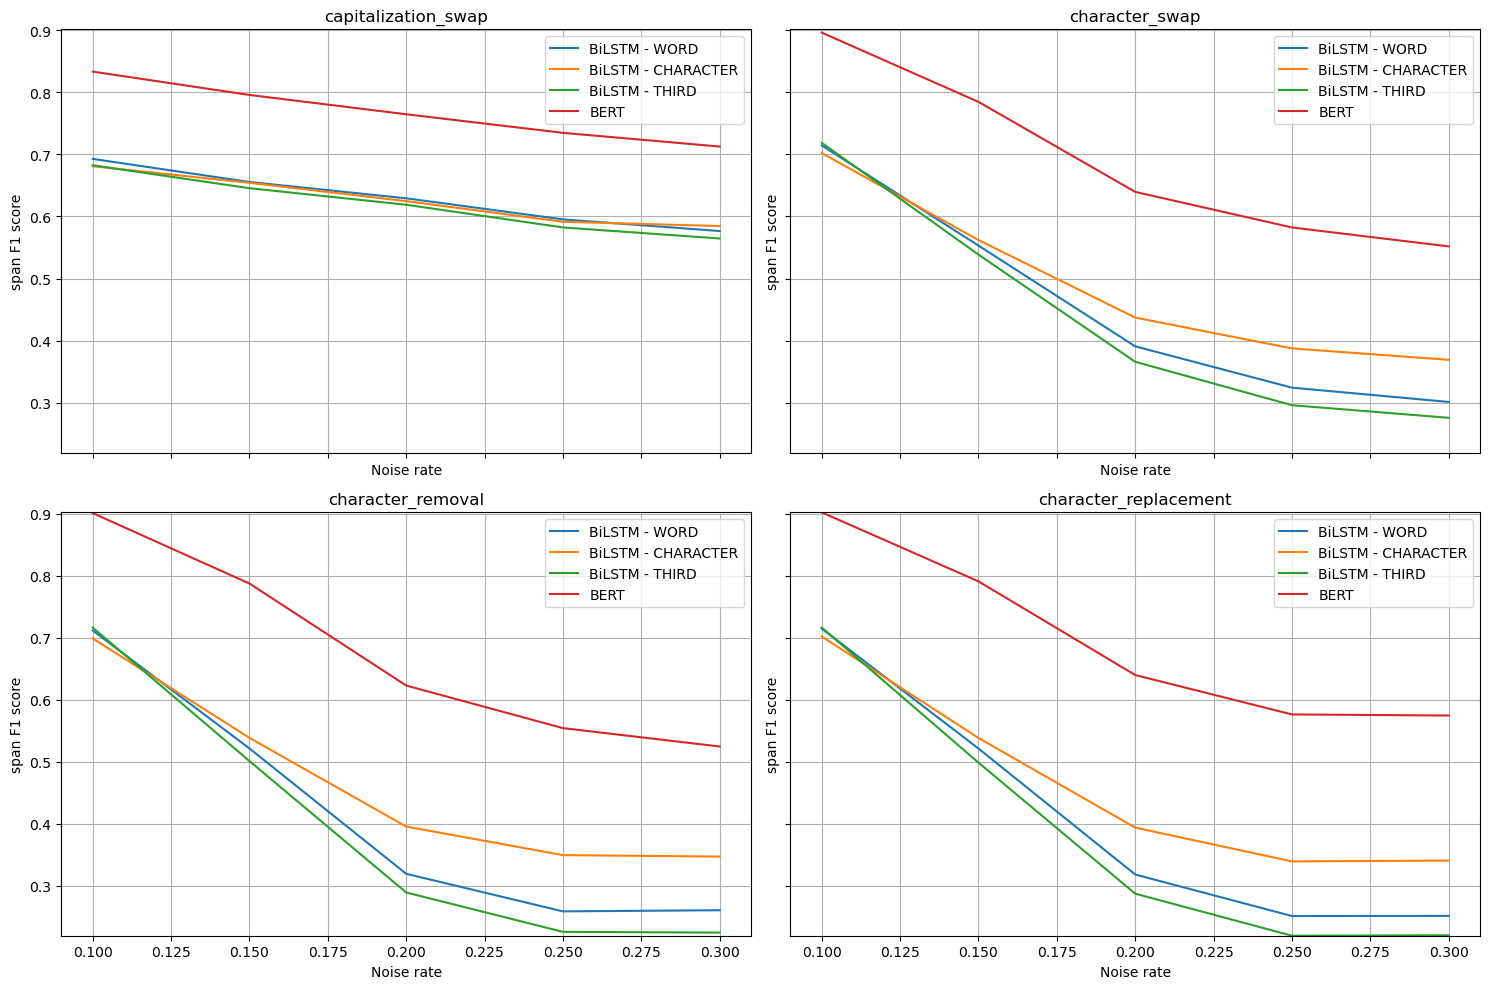

In [6]:
df_word = pd.read_csv("out/df_altered_2_word.csv")
df_char = pd.read_csv("out/df_altered_2_char.csv")
df_random = pd.read_csv("out/df_altered_2_random.csv")
df_bert = pd.read_csv("out/df_altered_2_bert.csv")  # Add this line to read BERT data

# Get unique noise types
noise_types = df_word['Noise Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(), df_random['F1 Score'].min(), df_bert['F1 Score'].min())  # Include BERT
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(), df_random['F1 Score'].max(), df_bert['F1 Score'].max())  # Include BERT

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Noise Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model3_filtered = df_random[df_random['Type'] == noise_type]
    df_model4_filtered = df_bert[df_bert['Type'] == noise_type]  # Filter BERT data
    
    # Plotting
    axs[i].plot(df_model1_filtered['Noise Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].plot(df_model3_filtered['Rate'], df_model3_filtered['F1 Score'], label='BiLSTM - THIRD')
    axs[i].plot(df_model4_filtered['Rate'], df_model4_filtered['F1 Score'], label='BERT')  # Add BERT plot
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


#### Altered 3

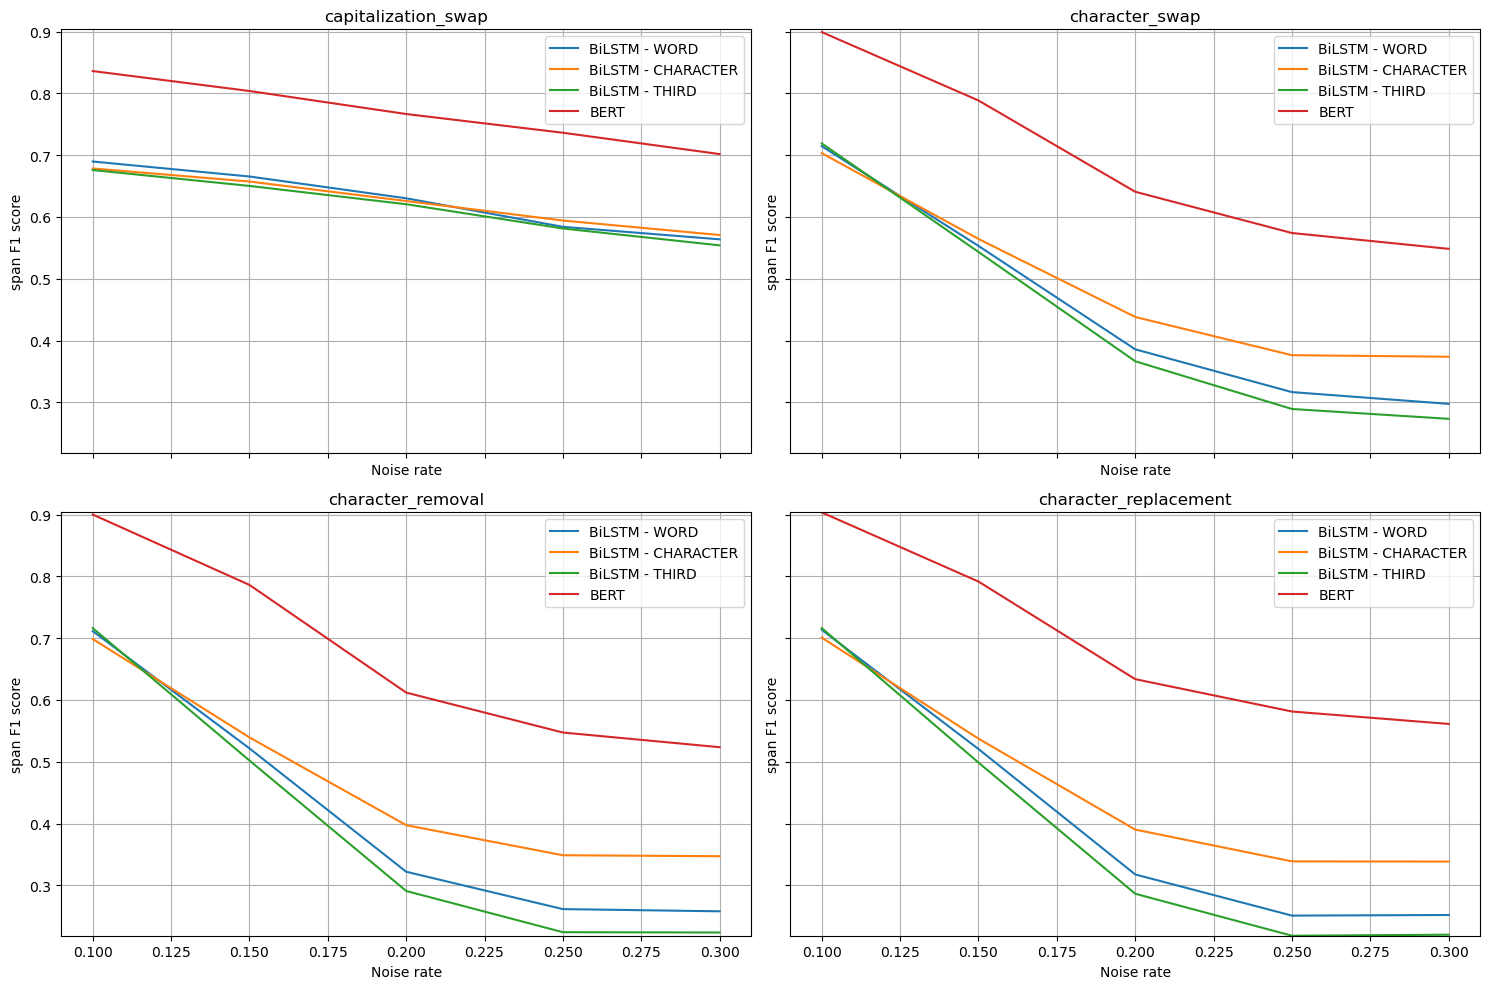

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
df_word = pd.read_csv("out/df_altered_3_word.csv")
df_char = pd.read_csv("out/df_altered_3_char.csv")
df_random = pd.read_csv("out/df_altered_3_random.csv")
df_bert = pd.read_csv("out/df_altered_3_bert.csv")  # Add this line to read BERT data

# Get unique noise types
noise_types = df_word['Noise Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(), df_random['F1 Score'].min(), df_bert['F1 Score'].min())  # Include BERT
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(), df_random['F1 Score'].max(), df_bert['F1 Score'].max())  # Include BERT

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Noise Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model3_filtered = df_random[df_random['Type'] == noise_type]
    df_model4_filtered = df_bert[df_bert['Type'] == noise_type]  # Filter BERT data
    
    # Plotting
    axs[i].plot(df_model1_filtered['Noise Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].plot(df_model3_filtered['Rate'], df_model3_filtered['F1 Score'], label='BiLSTM - THIRD')
    axs[i].plot(df_model4_filtered['Rate'], df_model4_filtered['F1 Score'], label='BERT')  # Add BERT plot
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()
